In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']= 200
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.

In [2]:
df = pd.read_csv(r'delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [20]:
df.isna().sum()

Deliverytime    0
Sortingtime     0
dtype: int64

# Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab97643a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab97643fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab97643760>,
 'medians': [<matplotlib.lines.Line2D at 0x1ab976515b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ab97651880>,
 'means': []}

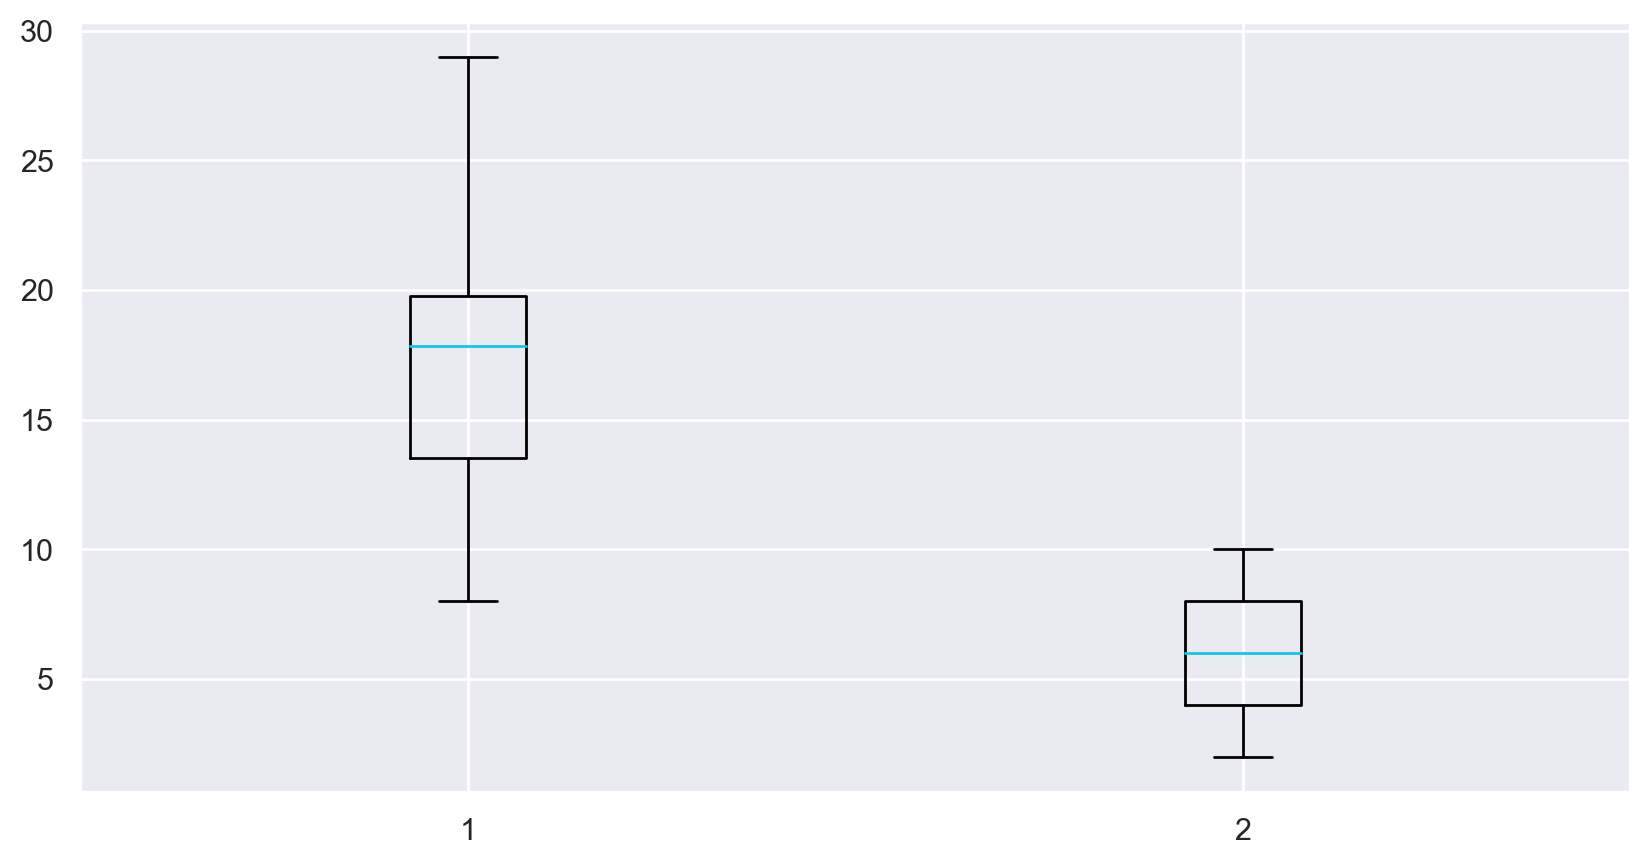

In [22]:
#Finding out outlier using Boxplot

plt.boxplot(df)

# Understand the relationship

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

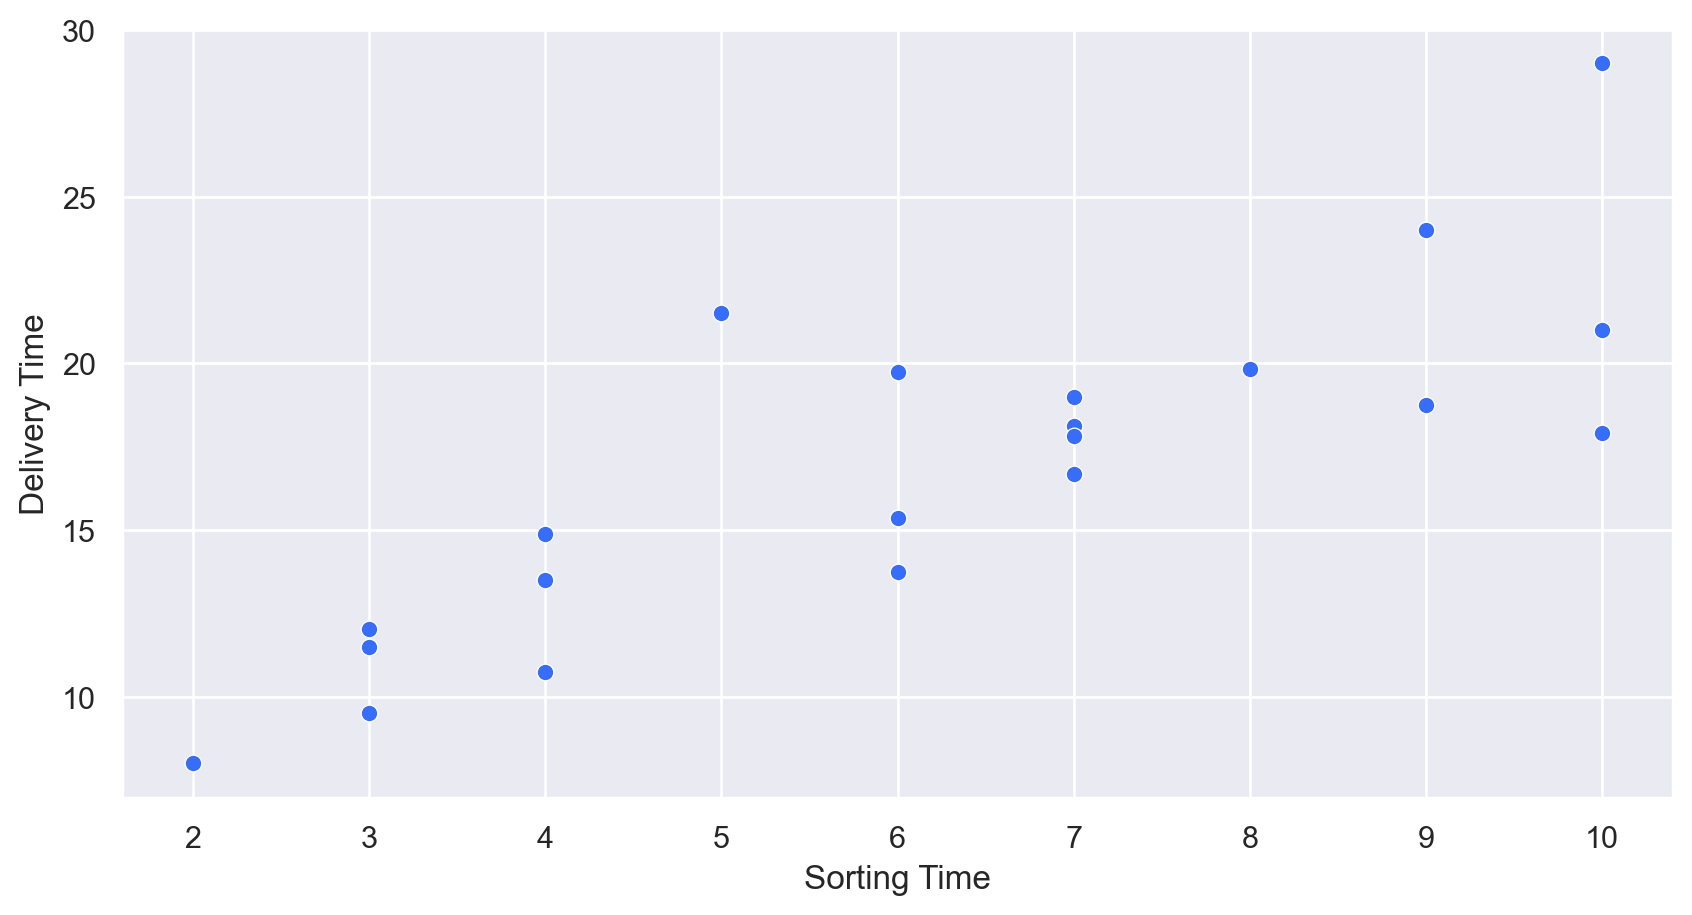

In [8]:
#Approach-1

sns.scatterplot(df['Sorting Time'], df['Delivery Time'])

In [9]:
#Approach-2

df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'Sorting Time')

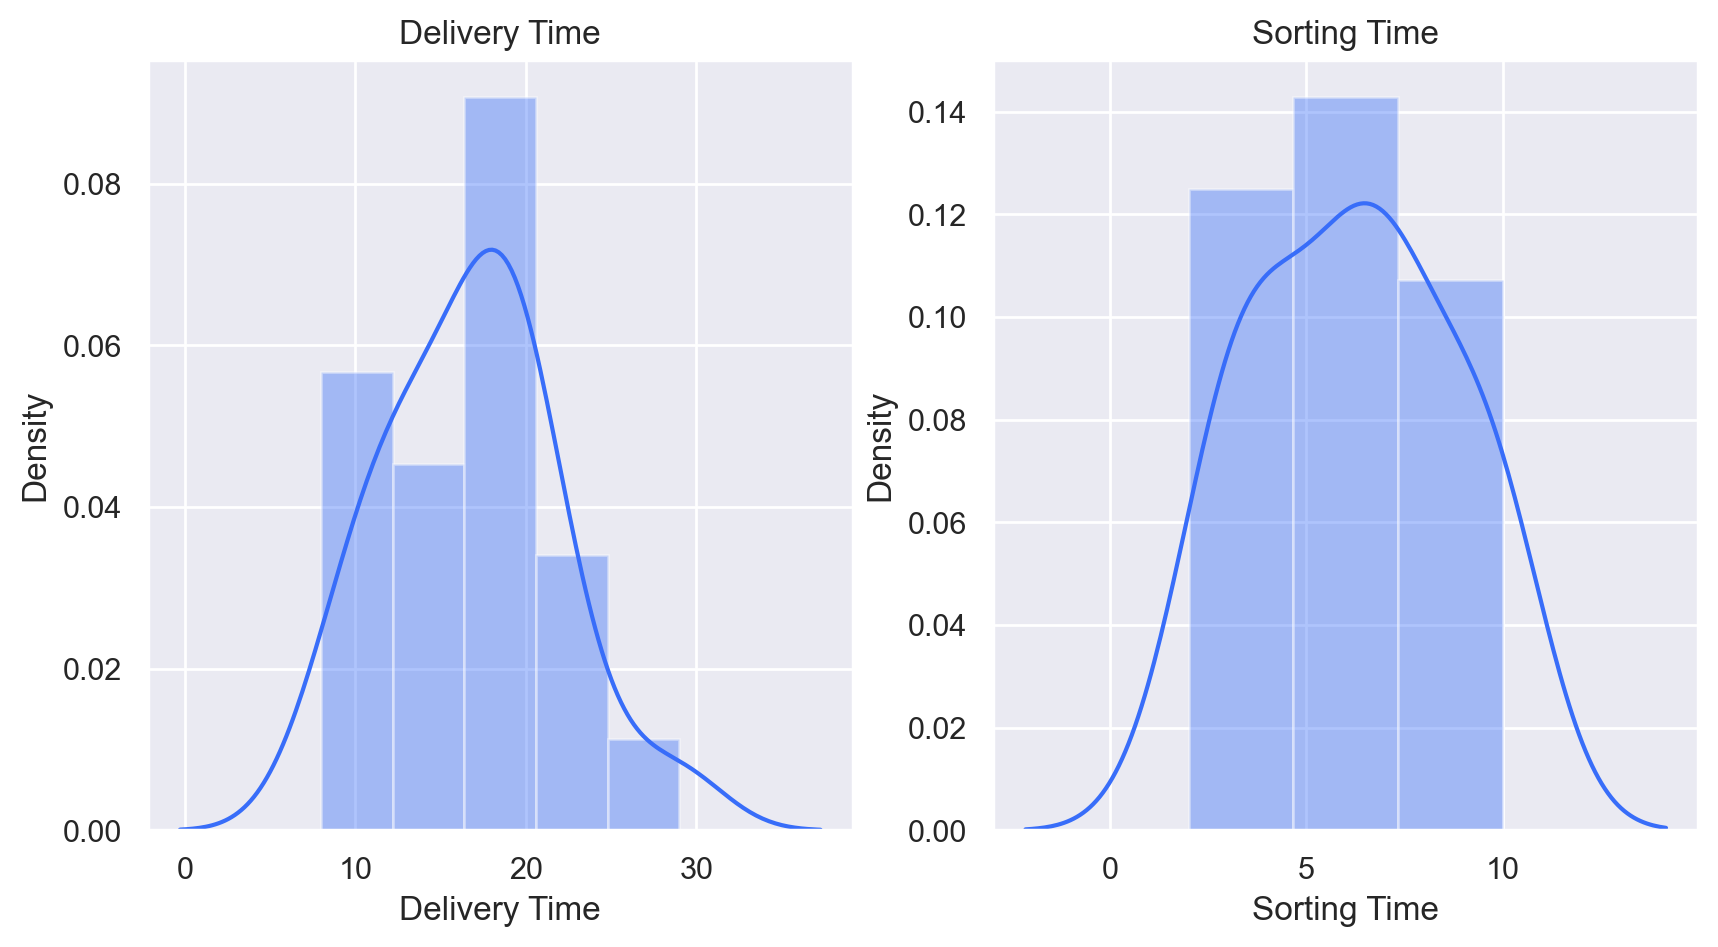

In [10]:
#plotting graph to check the data follows normal distribution or not

plt.subplot(1,2,1)
sns.distplot(df['Delivery Time'])
plt.title('Delivery Time')

plt.subplot(1,2,2)
sns.distplot(df['Sorting Time'])
plt.title('Sorting Time')

# Feature Engineering

In [11]:
#Renaming the column because in ols model does not accept space in between the column name
df.rename(columns={'Delivery Time':'Deliverytime', 'Sorting Time':'Sortingtime'},inplace=True)

<AxesSubplot:xlabel='Deliverytime', ylabel='Sortingtime'>

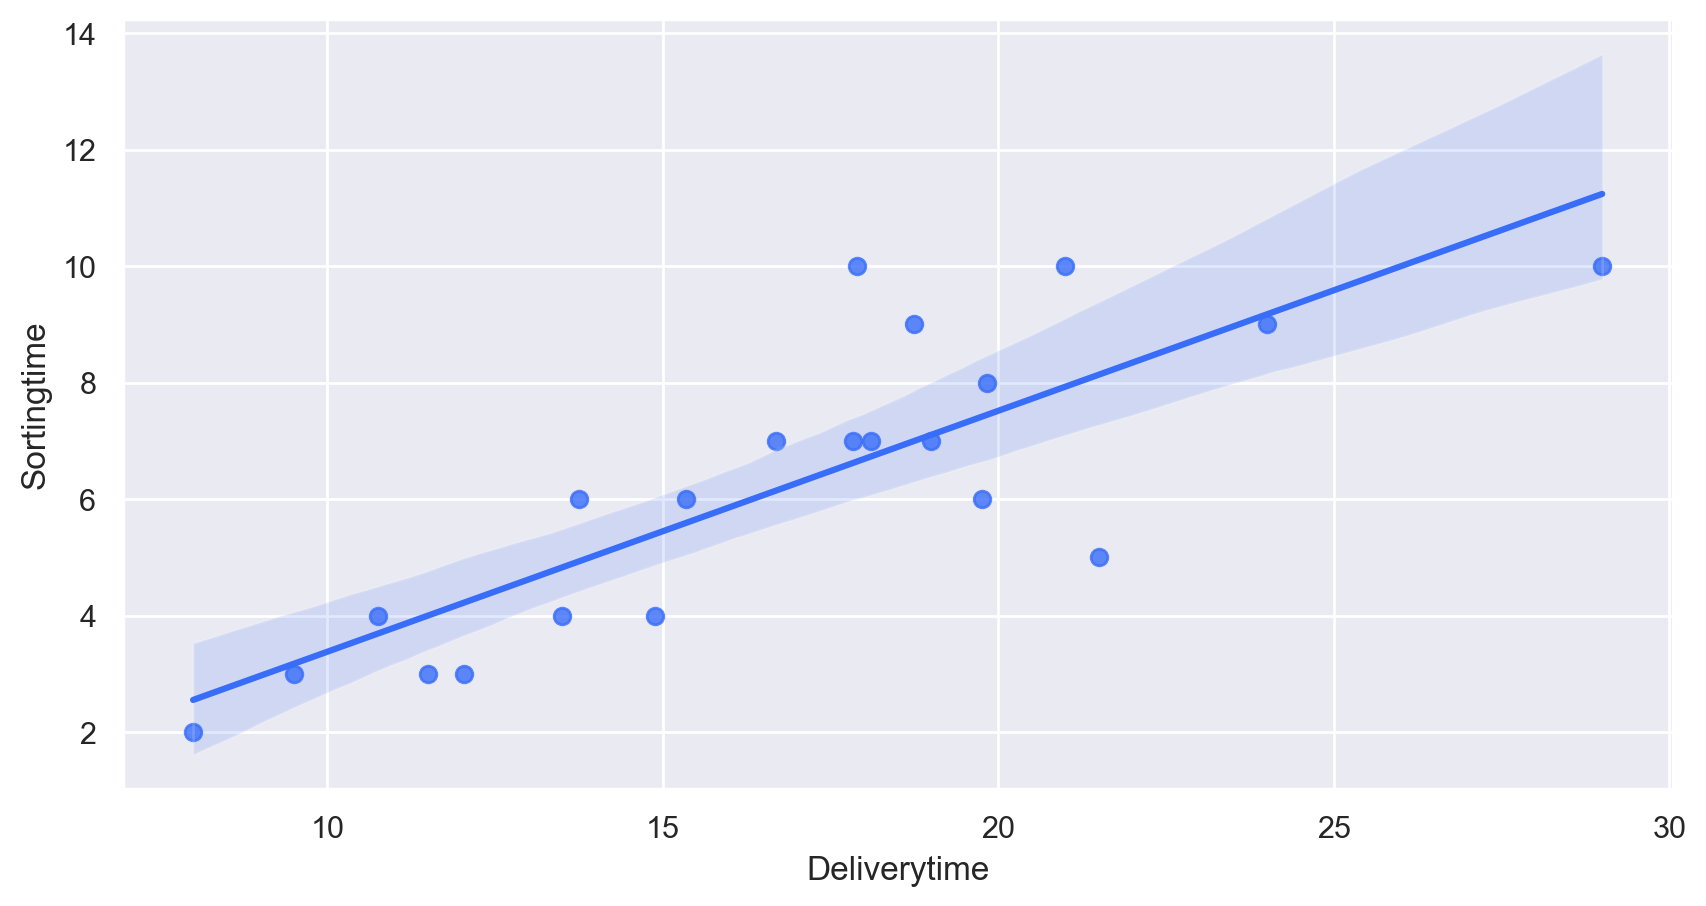

In [12]:
sns.regplot(x=df['Deliverytime'], y=df['Sortingtime'])

# Model building with no transformation

In [49]:
# import statsmodel library
import statsmodels.formula.api as smf

In [79]:
#Create a model
model1 = smf.ols('Deliverytime ~ Sortingtime', data=df).fit()

In [15]:
c,m=model1.params
c,m

(6.5827339719970555, 1.649019896831246)

In [16]:
model1.pvalues

Intercept      0.001147
Sortingtime    0.000004
dtype: float64

In [81]:
#Checking model accuracy
model1.rsquared, model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model prediction

In [18]:
df.head()

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [19]:
sortingtime= 7

y=m*sortingtime+c
y

18.125873249815776

Numerical variables may have high skewed and non-normal distribution (Gaussian Distribution) caused by outliers, highly exponential distributions, etc. Therefore we go for data transformation.

# Model building with logarithm transformation

In [85]:
model2 = smf.ols('Deliverytime ~ np.log(Sortingtime)', data=df).fit()

In [86]:
#Checking model accuracy- R2 value
model2.rsquared, model2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

# Model building with SQRT transformation

In [87]:
model3 = smf.ols('Deliverytime ~ np.sqrt(Sortingtime)', data=df).fit()

In [88]:
#Checking model accuracy- R2 value
model3.rsquared, model3.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

# Model building with exponential transformation

In [89]:
model4 = smf.ols('Deliverytime ~ np.exp(Sortingtime)', data=df).fit()

In [90]:
#Checking model accuracy- R2 value
model4.rsquared, model4.rsquared_adj

(0.3611177022709089, 0.3274923181799041)

# Model building with cube root transformation

In [91]:
model5 = smf.ols('Deliverytime ~ np.cbrt(Sortingtime)', data=df).fit()

In [92]:
model5.rsquared, model5.rsquared_adj

(0.6974182292354247, 0.6814928728793945)

Among all the transformation the cube root tranformation showing high rsquared value